In [1]:
import numpy as np
from numpy import random
import scipy as sp
import pandas as pd

# import scanpy for dimensionality reduction and plotting
import anndata as ad
from scanpy.api.tl import tsne
from scanpy.api.tl import umap
from scanpy.api.tl import diffmap
from scanpy.api import pp

# set viridis as the default color map
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
mpl.rcParams['image.cmap'] = 'viridis'

In [2]:
# simulation
import tree
import simulation as sim
import sim_utils as sut
import count_model as cmod

In [3]:
rseed = 42
np.random.seed(rseed)

In [4]:
X = pd.read_csv("./learn_dataset/Treutlein2014.txt", sep="\t", index_col=0)
N, G = X.shape

In [5]:
branches = ["fibro", "neuro", "myo"]
topology = [["fibro", "neuro"], ["fibro", "myo"]]
time = {"fibro":34, "neuro":46, "myo":22}
t = tree.Tree(topology=topology, G=G, time=time, num_branches=len(branches), branch_points=1, modules=0)

In [6]:
neuro = pd.read_csv("./learn_dataset/neuro.csv", index_col=0)
fibro = pd.read_csv("./learn_dataset/fibro.csv", index_col=0)
myo = pd.read_csv("./learn_dataset/myo.csv", index_col=0)

In [7]:
t.add_genes({"neuro": np.array(neuro), 
             "fibro": np.array(fibro),
             "myo": np.array(myo)})

In [9]:
neuro_density = np.array(pd.read_csv("./learn_dataset/neuro_density.csv", index_col=0)).flatten()
fibro_density = np.array(pd.read_csv("./learn_dataset/fibro_density.csv", index_col=0)).flatten()
myo_density = np.array(pd.read_csv("./learn_dataset/myo_density.csv", index_col=0)).flatten()

total_density = np.sum(neuro_density) + np.sum(myo_density) + np.sum(fibro_density)

In [10]:
tree_density = {"neuro": neuro_density / total_density,
               "fibro": fibro_density / total_density,
               "myo": myo_density / total_density}

In [11]:
t.set_density(tree_density)

In [15]:
X1, labs1, brns1, scalings1 = sim.sample_density(t, N, alpha=np.ones(G)*0.2,
                                                 beta=np.ones(G)*2, scale_mean=0, scale_v=0.1)

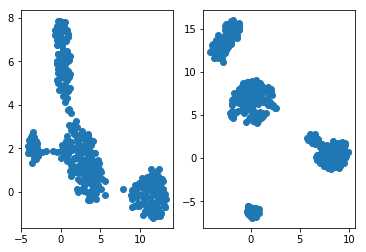

In [18]:
data1 = ad.AnnData(np.log(X1+1))
pp.neighbors(data1, use_rep='X')
umap(data1)
dm1 = data1.obsm["X_umap"]
br_names1, indices1 = np.unique(brns1, return_inverse=True)

data2 = ad.AnnData(np.log(X+1))
pp.neighbors(data2, use_rep='X')
umap(data2)
dm2 = data2.obsm["X_umap"]

fig, ax = plt.subplots(ncols=2)
# fig.set_size_inches(w=12, h=12)
ax[0].scatter(dm1[:, 0], dm1[:, 1])
ax[1].scatter(dm2[:, 0], dm2[:, 1])

In [35]:
together = np.concatenate((X, X1))
original = ["original"] * N
simulated = ["simulated"] * N
origin = np.concatenate((original, simulated))

         Falling back to preprocessing with `sc.pp.pca` and default params.


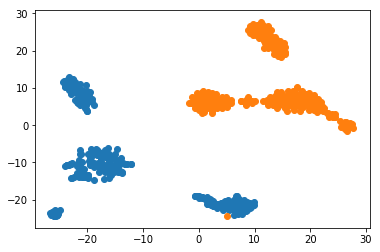

In [37]:
data = ad.AnnData(np.log(together+1))
pp.neighbors(data, use_rep='X')
tsne(data)
dm = data.obsm["X_tsne"]

fig, ax = plt.subplots()
# fig.set_size_inches(w=12, h=12)
ax.scatter(dm[origin=="original", 0], dm[origin=="original", 1], label="original")
ax.scatter(dm[origin=="simulated", 0], dm[origin=="simulated", 1], label="simulated")